Considera los datasets *titanic_train, titanic_val, titanic_test y gender_submission*




Para cada modelo elige al menos dos combinaciones de hiperparámetros distintas y entrena para predecir la supervivencia de pasajeros del titanic usando los datos *titanic_train* (es decir, debes tener al menos 6 predictores) 
Elige una metrica para medir el performance de tus modelos
Evalúa la métrica anterior sobre los datos *titanic_val*. **Define cual de todos tus predictores (son al menos 6) es el mejor**
Obtén las predicciones para *titanic_test*












## Data reading

In [ ]:
#loading data
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.utils import shuffle

from sklearn.model_selection import  train_test_split

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import numpy as np

In [ ]:
#Cargando los archivos 
data_train = pd.read_excel("/content/titanic_train.xlsx")
data_test = pd.read_excel("/content/titanic_val.xlsx")

In [ ]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          554
Embarked         2
dtype: int64

In [ ]:
data_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             36
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          133
Embarked         0
dtype: int64

In [ ]:
data_test = data_test.dropna()
data_train = data_train.dropna()

In [ ]:
X_train = data_train.drop(labels = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y_train = data_train['Survived']

In [ ]:
X_test = data_test.drop(labels = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y_test = data_test['Survived']

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,3,male,6.0,0,1,12.4750,S
6,1,female,24.0,0,0,49.5042,C
9,1,female,21.0,2,2,262.3750,C
10,3,female,27.0,0,1,12.4750,S
13,1,male,39.0,0,0,0.0000,S


In [ ]:
y_train

2      1
6      1
9      1
10     1
13     0
      ..
669    1
676    1
684    1
696    1
702    1
Name: Survived, Length: 141, dtype: int64

In [ ]:
X_train['Sex'] = label.fit_transform(X_train['Sex'])
X_test['Sex'] = label.fit_transform(X_test['Sex'])
dict_gen = {x:y for x,y in enumerate(label.classes_)}
dict_gen

{0: 'female', 1: 'male'}

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True, columns=['Embarked'])
X_test = pd.get_dummies(X_test, drop_first=True, columns=['Embarked'])

In [ ]:
columns = X_test.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.mean(axis=0).round(2),X_train.var(axis=0)

(array([ 0.,  0., -0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
X_test.mean(axis=0).round(2),X_test.var(axis=0)

(array([-0.,  0., -0., -0.,  0.,  0., -0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

## Modelos

### Modelo 1

In [ ]:
#Random Forest Modelo 1 de 2
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=3, n_estimators=300) #hyperparameters (n_estimators=300, criterion="gini", max_features="auto", max_depth=3)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_raw = model_rf.predict_proba(X_test)

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
717,0.717,0.785714,0.708333,0.894737,0.790698
713,0.713,0.785714,0.708333,0.894737,0.790698
715,0.715,0.785714,0.708333,0.894737,0.790698
716,0.716,0.785714,0.708333,0.894737,0.790698
712,0.712,0.785714,0.708333,0.894737,0.790698
718,0.718,0.785714,0.708333,0.894737,0.790698
719,0.719,0.785714,0.708333,0.894737,0.790698
720,0.720,0.785714,0.708333,0.894737,0.790698
721,0.721,0.785714,0.708333,0.894737,0.790698
722,0.722,0.785714,0.708333,0.894737,0.790698


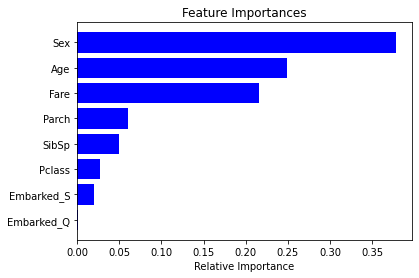

In [ ]:
features = columns
importances = model_rf.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

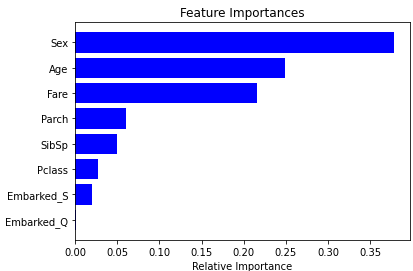

### Modelo 2

In [ ]:
#Random Forest modelo 2 de 2
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=2, n_estimators=500, criterion="entropy") #hyperparameters (n_estimators=500, criterion="entropy", max_features="auto", max_depth=2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_raw = model_rf.predict_proba(X_test)

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
652,0.652,0.785714,0.750000,0.857143,0.800000
651,0.651,0.785714,0.750000,0.857143,0.800000
650,0.650,0.785714,0.750000,0.857143,0.800000
649,0.649,0.785714,0.750000,0.857143,0.800000
648,0.648,0.785714,0.750000,0.857143,0.800000
662,0.662,0.761905,0.708333,0.850000,0.772727
721,0.721,0.761905,0.666667,0.888889,0.761905
697,0.697,0.761905,0.708333,0.850000,0.772727
696,0.696,0.761905,0.708333,0.850000,0.772727
695,0.695,0.761905,0.708333,0.850000,0.772727


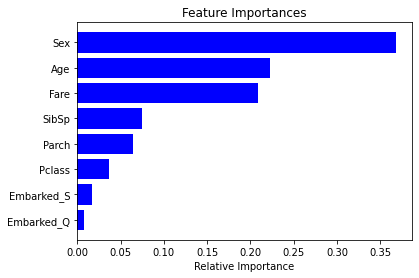

In [ ]:
features = columns
importances = model_rf.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

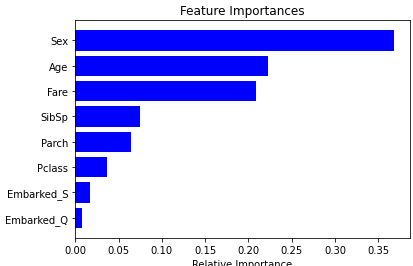

### Modelo 3

In [ ]:
#Gradient Boosting modelo 1 de 2
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=200)  #hyperparameters (n_estimators=200, criterion="friedman_mse", learning_rate=0.1, max_depth=3, loss="deviance")
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_raw = model_gb.predict_proba(X_test)

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
381,0.381,0.785714,0.916667,0.758621,0.830189
393,0.393,0.785714,0.916667,0.758621,0.830189
353,0.353,0.785714,0.958333,0.741935,0.836364
354,0.354,0.785714,0.958333,0.741935,0.836364
355,0.355,0.785714,0.958333,0.741935,0.836364
356,0.356,0.785714,0.958333,0.741935,0.836364
357,0.357,0.785714,0.958333,0.741935,0.836364
358,0.358,0.785714,0.958333,0.741935,0.836364
359,0.359,0.785714,0.958333,0.741935,0.836364
396,0.396,0.785714,0.916667,0.758621,0.830189


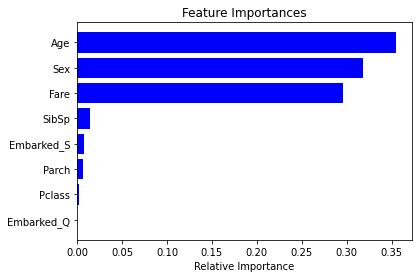

In [ ]:
features = columns
importances = model_gb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

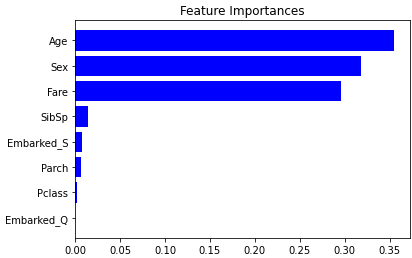

### Modelo 4

In [ ]:
#Gradient Boosting modelo 2 de 2
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=400, max_depth=2)  #hyperparameters (n_estimators=400, criterion="friedman_mse", learning_rate=0.1, max_depth=2, loss="deviance")
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_raw = model_gb.predict_proba(X_test)

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
937,0.937,0.809524,0.791667,0.863636,0.826087
933,0.933,0.809524,0.791667,0.863636,0.826087
936,0.936,0.809524,0.791667,0.863636,0.826087
922,0.922,0.809524,0.833333,0.833333,0.833333
923,0.923,0.809524,0.833333,0.833333,0.833333
924,0.924,0.809524,0.833333,0.833333,0.833333
925,0.925,0.809524,0.833333,0.833333,0.833333
935,0.935,0.809524,0.791667,0.863636,0.826087
934,0.934,0.809524,0.791667,0.863636,0.826087
938,0.938,0.809524,0.791667,0.863636,0.826087


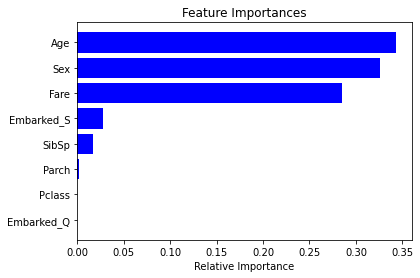

In [ ]:
features = columns
importances = model_gb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

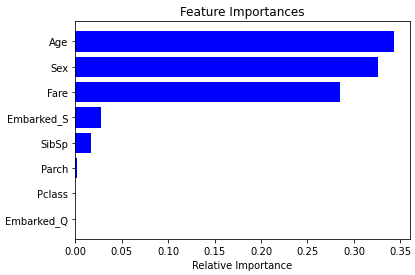

### Modelo 5

In [ ]:
#SVM modelo 1 de 2
from sklearn.svm import SVC
model_svc = SVC(probability=True)  #hyperparameters (kernel="rbf", gamma="scale", probability=True)
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_raw = model_svc.predict_proba(X_test)

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
778,0.778,0.785714,0.750000,0.857143,0.800000
776,0.776,0.785714,0.750000,0.857143,0.800000
849,0.849,0.785714,0.666667,0.941176,0.780488
850,0.850,0.785714,0.666667,0.941176,0.780488
851,0.851,0.785714,0.666667,0.941176,0.780488
788,0.788,0.785714,0.750000,0.857143,0.800000
787,0.787,0.785714,0.750000,0.857143,0.800000
786,0.786,0.785714,0.750000,0.857143,0.800000
784,0.784,0.785714,0.750000,0.857143,0.800000
783,0.783,0.785714,0.750000,0.857143,0.800000


### Modelo 6

In [ ]:
#SVM modelo 2 de 2
from sklearn.svm import SVC
model_svc = SVC(gamma="auto", probability=True)  #hyperparameters (kernel="rbf", probability=True)
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_raw = model_svc.predict_proba(X_test)

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  precision_list.append(precision_score(y_test,y_pred))
  recall_list.append(recall_score(y_test,y_pred))
  f1_list.append(f1_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics.sort_values(by=['Accuracy'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
776,0.776,0.785714,0.750000,0.857143,0.800000
772,0.772,0.785714,0.750000,0.857143,0.800000
842,0.842,0.785714,0.666667,0.941176,0.780488
843,0.843,0.785714,0.666667,0.941176,0.780488
783,0.783,0.785714,0.750000,0.857143,0.800000
782,0.782,0.785714,0.750000,0.857143,0.800000
780,0.780,0.785714,0.750000,0.857143,0.800000
779,0.779,0.785714,0.750000,0.857143,0.800000
778,0.778,0.785714,0.750000,0.857143,0.800000
777,0.777,0.785714,0.750000,0.857143,0.800000


## Predictores

### Modelo 1
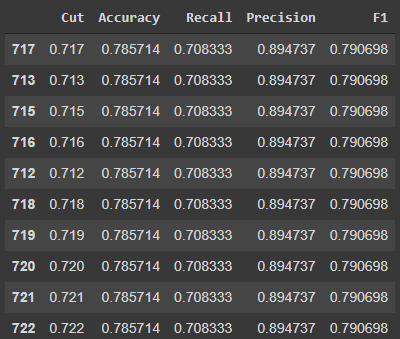

### Modelo 2
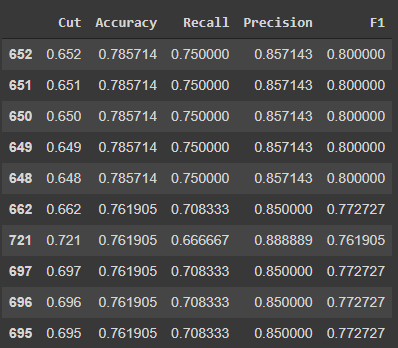

### Modelo 3 
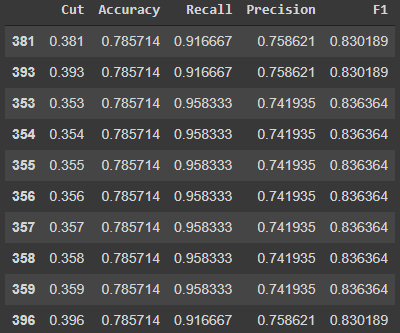

### Modelo 4
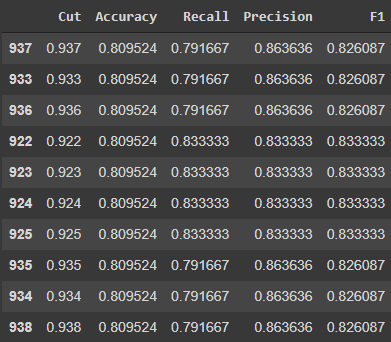

### Modelo 5
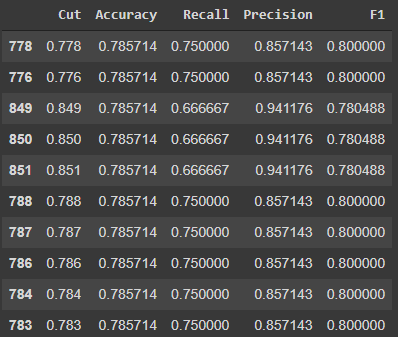

### Modelo 6
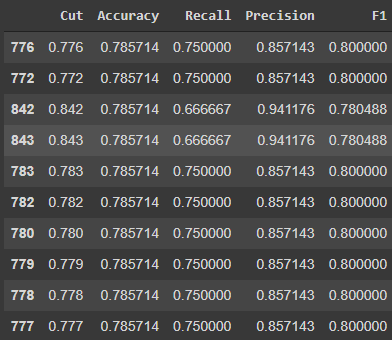

Prediccion 1: A=0.785714, R=0.70833, P=0.894737, F1=0.790698

Prediccion 2: A=0.785714, R=0.75, P=0.857143, F1=0.8

Prediccion 3: A=0.785714, R=0.916667, P=0.758621, F1=0.830189

Prediccion 4: A=0.809524, R=0.791667, P=0.863636, F1=0.826087

Prediccion 5: A=0.785714, R=0.75, P=0.857143, F1=0.8

Prediccion 6: A=0.785714, R=0.75, P=0.857143, F1=0.8

## Predicciones para titanic_test

### Data reading

In [ ]:
#cargando los datos
data_train = pd.read_excel("/content/titanic_train.xlsx")
data_test = pd.read_excel("/content/titanic_test.xlsx")

In [ ]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          554
Embarked         2
dtype: int64

In [ ]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data_test = data_test.dropna()
data_train = data_train.dropna()

In [ ]:
X_train = data_train.drop(labels = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y_train = data_train['Survived']

In [ ]:
X_test = data_train.drop(labels = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,3,male,6.0,0,1,12.4750,S
6,1,female,24.0,0,0,49.5042,C
9,1,female,21.0,2,2,262.3750,C
10,3,female,27.0,0,1,12.4750,S
13,1,male,39.0,0,0,0.0000,S


In [ ]:
y_train

2      1
6      1
9      1
10     1
13     0
      ..
669    1
676    1
684    1
696    1
702    1
Name: Survived, Length: 141, dtype: int64

In [ ]:
X_train['Sex'] = label.fit_transform(X_train['Sex'])
X_test['Sex'] = label.fit_transform(X_test['Sex'])
dict_gen = {x:y for x,y in enumerate(label.classes_)}
dict_gen

{0: 'female', 1: 'male'}

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True, columns=['Embarked'])
X_test = pd.get_dummies(X_test, drop_first=True, columns=['Embarked'])

In [ ]:
columns = X_test.columns

In [ ]:
columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.mean(axis=0).round(2),X_train.var(axis=0)

(array([ 0.,  0., -0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
X_test.mean(axis=0).round(2),X_test.var(axis=0)

(array([ 0.,  0., -0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

### Modelo mejor empeñado

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=200)  #hyperparameters (n_estimators=200, criterion="friedman_mse", learning_rate=0.1, max_depth=3, loss="deviance")
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred_raw = model_gb.predict_proba(X_test)

In [ ]:
final_pred = model_gb.predict(X_test)
final_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
submission = pd.DataFrame({'PassengerId': data_train['PassengerId'], 'Survived':final_pred})

In [ ]:
submission.head()

,PassengerId,Survived
2,752,1
6,711,1
9,743,1
10,824,1
13,807,0


In [ ]:
filename = "1854339IAAut2P.csv"
submission.to_csv(filename, index=False)